<a href="https://colab.research.google.com/github/zakizul2000/Generation-and-visualization-of-simulated-patient-test-results-with-Python/blob/main/SIT_Pre_interview_Zakirah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

#import relevant libraries and packages
import pandas as pd
import numpy as np
import random, requests
import string

In [ ]:
#generate series of alphanumeric number to represent patient ID
patientID = []
n_patientID = 10000 #number of patients
n_string = 7 #size of string
for n in range(n_patientID):
  #generate combination of random uppercase letters and numbers
  res = ''.join(random.choices(string.ascii_uppercase +
                             string.digits, k=n_string))
  patientID.append(str(res))

print(patientID)

In [ ]:
#generate results for each test - ckmb, cortisol, ferritin, vitb12 using scipy.stats.gamma to achieve gamma distribution
from scipy.stats import gamma
a = 1 #set shape parameter to 1

#m: mean, std:standard deviation
#values taken from table 1: statistical characteristics of test results
ckmb_m, ckmb_std = 20, 40
ckmb_results = gamma.rvs(a, loc=ckmb_m, scale=ckmb_std, size=10000)

cortisol_m, cortisol_std = 350, 700
cortisol_results = gamma.rvs(a, loc=cortisol_m, scale=cortisol_std, size=10000)

ferritin_m, ferritin_std = 210, 270
ferritin_results = gamma.rvs(a, loc=ferritin_m, scale=ferritin_std, size=10000)

vitb12_m, vitb12_std = 340, 210
vitb12_results = gamma.rvs(a, loc=vitb12_m, scale=vitb12_std, size=10000)

In [ ]:
#creating a dataframe for each test with columns "patientID", "results", "test", "unit"
cortisol_df = pd.DataFrame(
    {'patientID': patientID,
     'results': cortisol_results}
)
cortisol_df["test"] = 'Cortisol'
cortisol_df["unit"] = 'nmol/L'

vitb12_df = pd.DataFrame(
    {'patientID': patientID,
     'results': vitb12_results}
)
vitb12_df["test"] = 'VitB12'
vitb12_df["unit"] = 'pmol/L'

ferritin_df = pd.DataFrame(
    {'patientID': patientID,
     'results': ferritin_results}
)
ferritin_df["test"] = 'Ferritin'
ferritin_df["unit"] = 'ug/L'

ckmb_df = pd.DataFrame(
    {'patientID': patientID,
     'results': ckmb_results}
)
ckmb_df["test"] = 'CK-MB'
ckmb_df["unit"] = 'ug/L'

#combine ckmb, cortisol, ferritin, vitb12 dataframes together
frames = [cortisol_df, vitb12_df, ferritin_df, ckmb_df]
patient_test_df = pd.concat(frames)
patient_test_df.results = patient_test_df.results.round(2) #round value of results to 2 decimal places
print(patient_test_df)

In [ ]:
#import relevant libraries to generate time and date data
from random import randrange
from datetime import timedelta
from datetime import datetime

time = []
n_time = 40000 #10000 patients x 4 tests = 40000 rows
#function to return time in hours, minutes, seconds
def randomTime():
    #generate random number scaled to number of seconds in a day = 86400s
    rtime = int(random.random()*86400)
    hours   = int(rtime/3600)
    minutes = int((rtime - hours*3600)/60)
    seconds = rtime - hours*3600 - minutes*60

    #format time string
    time_string = '%02d:%02d:%02d' % (hours, minutes, seconds)
    return time_string
#for loop to generate 40000 time stamps
for i in range(n_time):
  time.append(randomTime())

print(time)

dates = []
#function to return a random date between two given dates
def get_random_date(start, end):
  delta = end - start
  int_delta = delta.days
  random_day = randrange(int_delta)
  return start + timedelta(days = random_day)

d1 = datetime.strptime('6/1/2023', '%m/%d/%Y')#first day of month
d2 = datetime.strptime('6/30/2023', '%m/%d/%Y')#last day of month

for i in range(n_time):
  random_date = get_random_date(d1, d2)
  dates.append(random_date.strftime("%m/%d/%Y"))

print(dates)

#create date and time columns to patient_test and add generated data to dataframe
patient_test_df["date"] = dates
patient_test_df["time"] = time
#print simulated dataset
print(patient_test_df)

Text(0.5, 1.0, 'Distribution of Patient Test Results')

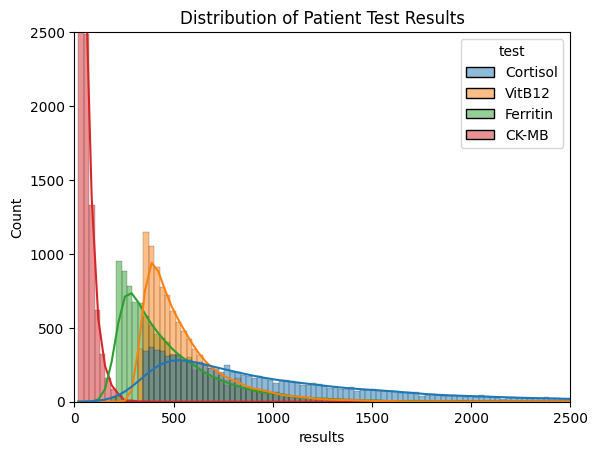

In [ ]:
#import relevant libraries for plotting
import seaborn as sns
from matplotlib import pyplot as plt

#plot dataset as a histogram plot
sns.histplot(patient_test_df, x="results", hue="test", kde="True")
plt.ylim(0, 2500)
plt.xlim(0, 2500)
plt.title("Distribution of Patient Test Results")

Text(0.5, 1.0, 'Daily Test Result Average for June')

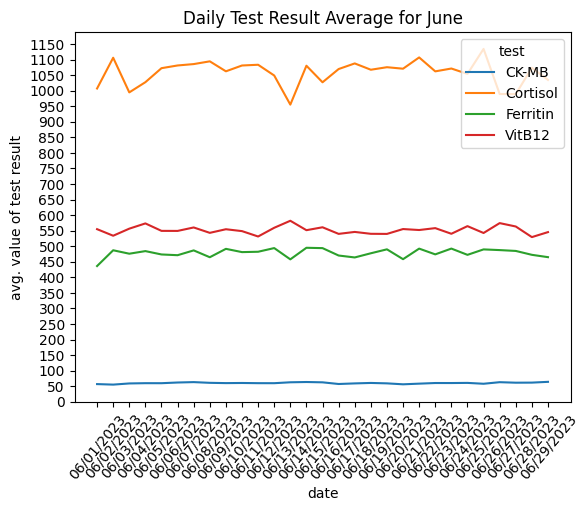

In [ ]:
#plot dataset as a time series line plot
#plotting the average result for each test for each day in a month
avg_results = patient_test_df.groupby(["date","test"]).mean(numeric_only=True) #calculate mean value
sns.lineplot(avg_results, x="date", y="results", hue="test")
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 1200, 50))
plt.ylabel('avg. value of test result')
plt.title("Daily Test Result Average for June")

In [ ]:
#save patient data to google drive as excel file
patient_test_df.to_excel('/content/drive/My Drive/Colab Notebooks/patient_data.xlsx', index=False)